11.1 Date and Time Data Types and Tools

In [3]:
from datetime import datetime


now = datetime.now()
now
now.year, now.month, now.day

(2025, 6, 30)

In [6]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta
delta.days
delta.seconds

56700

In [10]:
from datetime import timedelta


start = datetime(2011, 1, 7)
start + timedelta(12)
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [12]:
# Converting Between String and Datetime

stamp = datetime(2011, 1, 3)
str(stamp)
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [16]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]


[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [19]:
from dateutil.parser import parse


parse('2011-01-03')
parse('Jan 31, 1997 10:45 PM')
parse('6/12/2011', dayfirst=True)


datetime.datetime(2011, 12, 6, 0, 0)

In [3]:
import pandas as pd


datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [25]:
idx = pd.to_datetime(datestrs + [None])
idx
idx[2]
pd.isnull(idx)

array([False, False,  True])

11.2 Time Series Basics

In [27]:
import numpy as np


dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7), datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [28]:
ts + ts[::2]

2011-01-02    0.533332
2011-01-05         NaN
2011-01-07    0.249935
2011-01-08         NaN
2011-01-10   -1.341132
2011-01-12         NaN
dtype: float64

In [29]:
ts.index.dtype

dtype('<M8[ns]')

In [30]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

In [33]:
# Indexing, Selection, Subsetting

stamp = ts.index[2]
ts[stamp]
ts['1/10/2011']
ts['20110110']

np.float64(-0.6705660025906361)

In [34]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    2.406965
2000-01-02   -0.170215
2000-01-03   -0.011612
2000-01-04    1.002093
2000-01-05    0.681008
                ...   
2002-09-22    1.063356
2002-09-23   -0.106309
2002-09-24   -0.429057
2002-09-25   -0.056447
2002-09-26   -0.182454
Freq: D, Length: 1000, dtype: float64

In [35]:
longer_ts['2001']

2001-01-01   -2.450062
2001-01-02    0.305629
2001-01-03   -1.599354
2001-01-04   -0.020942
2001-01-05    0.610598
                ...   
2001-12-27    1.402375
2001-12-28    1.361957
2001-12-29    0.361688
2001-12-30   -0.992821
2001-12-31   -1.201574
Freq: D, Length: 365, dtype: float64

In [36]:
longer_ts['2001-05']

2001-05-01    0.348893
2001-05-02    1.085224
2001-05-03    0.283335
2001-05-04   -1.178362
2001-05-05    0.637868
2001-05-06   -0.697833
2001-05-07    1.296507
2001-05-08   -0.219078
2001-05-09    2.080236
2001-05-10   -0.365614
2001-05-11   -1.916350
2001-05-12   -0.666772
2001-05-13   -0.273095
2001-05-14    1.704602
2001-05-15   -1.145307
2001-05-16    0.666306
2001-05-17    0.528616
2001-05-18    1.408606
2001-05-19    0.103806
2001-05-20    0.236239
2001-05-21    0.100761
2001-05-22   -0.652602
2001-05-23    0.068542
2001-05-24    1.199558
2001-05-25    0.172469
2001-05-26    1.263186
2001-05-27   -1.059852
2001-05-28   -1.645744
2001-05-29    0.601711
2001-05-30    0.161887
2001-05-31    1.149261
Freq: D, dtype: float64

In [37]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.124967
2011-01-08    1.390102
2011-01-10   -0.670566
2011-01-12   -0.467199
dtype: float64

In [39]:
ts
ts['1/6/2011':'1/11/2011']

2011-01-07    0.124967
2011-01-08    1.390102
2011-01-10   -0.670566
dtype: float64

In [40]:
ts.truncate(after='1/9/2011')

2011-01-02    0.266666
2011-01-05    0.083875
2011-01-07    0.124967
2011-01-08    1.390102
dtype: float64

In [41]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4), index=dates, columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.875646,0.688429,0.098038,-0.647977
2001-05-09,-0.984600,1.259744,0.926050,-0.605072
2001-05-16,0.726223,-0.050434,-0.032705,1.684401
2001-05-23,1.264294,-0.105105,0.510292,-0.235080
2001-05-30,0.220199,0.712530,0.348008,-1.204685


In [43]:
# Time Series with Duplicate Indices

dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [44]:
dup_ts.index.is_unique

False

In [46]:
dup_ts['1/3/2000']
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [47]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [48]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

11.3 Date Ranges, Frequencies, and Shifting

In [49]:
ts
resampler = ts.resample('D')


2011-01-02    0.266666
2011-01-05    0.083875
2011-01-07    0.124967
2011-01-08    1.390102
2011-01-10   -0.670566
2011-01-12   -0.467199
dtype: float64

In [50]:
# Generating Date Ranges

index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [51]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [52]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [54]:
pd.date_range('2000-01-01', '2000-12-01', freq='BME')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BME')

In [55]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [56]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [58]:
# Frequencies and Date Offsets

from pandas.tseries.offsets import Hour, Minute


hour = Hour()
hour

four_hours = Hour(4)
four_hours



<4 * Hours>

In [59]:
pd.date_range('2000-01-01', '2000-01-03', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [60]:
Hour(2) + Minute(30)

<150 * Minutes>

In [61]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90min')

In [62]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-07-20 00:00:00'),
 Timestamp('2012-08-17 00:00:00')]

In [71]:
# Shifting (Leading and Lagging) Data

ts = pd.Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='ME'))
ts
ts.shift(2)
ts.shift(-2)
ts.shift(2, freq='ME')
ts.shift(3, freq='D')
ts.shift(1, freq='90min')

2000-01-31 01:30:00   -0.224903
2000-02-29 01:30:00   -1.156146
2000-03-31 01:30:00   -0.428432
2000-04-30 01:30:00    1.584472
dtype: float64

In [74]:
from pandas.tseries.offsets import Day, MonthEnd


now = datetime(2011, 11, 17)
now + 3 * Day()
now + MonthEnd()
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [76]:
offset = MonthEnd()
offset.rollforward(now)
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [77]:
ts = pd.Series(np.random.randn(20), index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15    0.241241
2000-01-19   -0.620675
2000-01-23   -1.085469
2000-01-27    0.508722
2000-01-31   -0.175109
2000-02-04   -0.399588
2000-02-08   -0.215406
2000-02-12    0.203684
2000-02-16   -1.725640
2000-02-20   -0.726289
2000-02-24    0.617942
2000-02-28   -0.488617
2000-03-03   -0.918555
2000-03-07    0.750791
2000-03-11   -0.323123
2000-03-15    0.868825
2000-03-19   -0.970692
2000-03-23    0.395445
2000-03-27    0.548725
2000-03-31   -0.613975
Freq: 4D, dtype: float64

In [78]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.226258
2000-02-29   -0.390559
2000-03-31   -0.032820
dtype: float64

In [80]:
ts.resample('ME').mean()

2000-01-31   -0.226258
2000-02-29   -0.390559
2000-03-31   -0.032820
Freq: ME, dtype: float64

11.4 Time Zone Handling

In [5]:
import pytz


pytz.common_timezones[-5:]
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [9]:
# Time Zone Localization and Conversion

import pandas as pd
import numpy as np


rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

print(ts.index.tz)

None


In [10]:
pd.date_range('3/9/2012 9:30', periods=6, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [13]:
ts
ts_utc = ts.tz_localize('UTC')
ts_utc
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [14]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    0.378116
2012-03-10 04:30:00-05:00    1.095845
2012-03-11 05:30:00-04:00   -0.482055
2012-03-12 05:30:00-04:00    0.520811
2012-03-13 05:30:00-04:00   -1.649021
2012-03-14 05:30:00-04:00   -0.534644
Freq: D, dtype: float64

In [17]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.378116
2012-03-10 15:30:00+01:00    1.095845
2012-03-11 14:30:00+01:00   -0.482055
2012-03-12 14:30:00+01:00    0.520811
2012-03-13 14:30:00+01:00   -1.649021
2012-03-14 14:30:00+01:00   -0.534644
dtype: float64

In [18]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

In [19]:
# Operations with Time Zone−Aware Timestamp Objects

stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [20]:
stamp_warsaw = pd.Timestamp('2011-03-12 04:00', tz='Europe/Warsaw')
stamp_warsaw

Timestamp('2011-03-12 04:00:00+0100', tz='Europe/Warsaw')

In [21]:
stamp_utc.value

1299902400000000000

In [22]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [24]:
from pandas.tseries.offsets import Hour


stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [26]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [28]:
# Operations Between Different Time Zones

rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.002894
2012-03-08 09:30:00   -0.170591
2012-03-09 09:30:00   -0.976508
2012-03-12 09:30:00    0.461956
2012-03-13 09:30:00    0.841297
2012-03-14 09:30:00   -0.089721
2012-03-15 09:30:00   -0.948797
2012-03-16 09:30:00    0.584072
2012-03-19 09:30:00    2.305139
2012-03-20 09:30:00   -1.123291
Freq: B, dtype: float64

In [33]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Kyiv')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

11.5 Periods and Period Arithmetic

In [37]:
p = pd.Period(2007, freq='Y-DEC')
p
p + 5
p - 2

Period('2005', 'Y-DEC')

In [38]:
pd.Period('2014', freq='Y-DEC') - p

<7 * YearEnds: month=12>

In [39]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [40]:
pd.Series(np.random.randn(6), index=rng)

2000-01    0.883917
2000-02   -2.290422
2000-03   -0.984667
2000-04    1.870592
2000-05    1.610708
2000-06   -0.428132
Freq: M, dtype: float64

In [41]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

In [45]:
# Period Frequency Conversion

p = pd.Period('2007', freq='Y-DEC')
p
p.asfreq('M', how='start')
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [49]:
p = pd.Period('2007', freq='Y-JUN')
p
p.asfreq('M', how='start')
p.asfreq('M', how='end')


Period('2007-06', 'M')

In [51]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('Y-JUN')

Period('2008', 'Y-JUN')

In [59]:
rng = pd.period_range('2006', '2009', freq='Y-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.asfreq('M', how='start')

2006-01    1.796750
2007-01   -0.690734
2008-01    0.781699
2009-01    0.468656
Freq: M, dtype: float64

In [62]:
ts.asfreq(freq='B', how='end')

/var/folders/qw/xxg7th2n7sn81t2kt_xmf_540000gn/T/ipykernel_34261/2506330133.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ts.asfreq(freq='B', how='end')


2006-12-29    1.796750
2007-12-31   -0.690734
2008-12-31    0.781699
2009-12-31    0.468656
Freq: B, dtype: float64

In [65]:
# Quarterly Period Frequencies

p = pd.Period('2012Q4', freq='Q-JAN')
p
p.asfreq('D', 'start')
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [68]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('min', 's') + 16 * 60
p4pm
p4pm.to_timestamp()

/var/folders/qw/xxg7th2n7sn81t2kt_xmf_540000gn/T/ipykernel_34261/2694820181.py:1: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  p4pm = (p.asfreq('B', 'e') - 1).asfreq('min', 's') + 16 * 60


Timestamp('2012-01-30 16:00:00')

In [70]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [72]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('min', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

/var/folders/qw/xxg7th2n7sn81t2kt_xmf_540000gn/T/ipykernel_34261/4096619187.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  new_rng = (rng.asfreq('B', 'e') - 1).asfreq('min', 's') + 16 * 60


2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

In [74]:
# Converting Timestamps to Periods (and Back)

rng = pd.date_range('2000-01-01', periods=3, freq='ME')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -1.267696
2000-02-29    0.042993
2000-03-31   -0.978764
Freq: ME, dtype: float64

In [75]:
pts = ts.to_period()
pts

2000-01   -1.267696
2000-02    0.042993
2000-03   -0.978764
Freq: M, dtype: float64

In [76]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    1.545700
2000-01-30   -1.183671
2000-01-31    0.364514
2000-02-01    0.460605
2000-02-02    0.410066
2000-02-03    0.673162
Freq: D, dtype: float64

In [77]:
ts2.to_period('M')

2000-01    1.545700
2000-01   -1.183671
2000-01    0.364514
2000-02    0.460605
2000-02    0.410066
2000-02    0.673162
Freq: M, dtype: float64

In [78]:
pts = ts2.to_period()
pts

2000-01-29    1.545700
2000-01-30   -1.183671
2000-01-31    0.364514
2000-02-01    0.460605
2000-02-02    0.410066
2000-02-03    0.673162
Freq: D, dtype: float64

In [79]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    1.545700
2000-01-30 23:59:59.999999999   -1.183671
2000-01-31 23:59:59.999999999    0.364514
2000-02-01 23:59:59.999999999    0.460605
2000-02-02 23:59:59.999999999    0.410066
2000-02-03 23:59:59.999999999    0.673162
Freq: D, dtype: float64

In [80]:
# Creating a PeriodIndex from Arrays

data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [81]:
data.year

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [82]:
data.quarter

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [84]:
index = pd.PeriodIndex.from_fields(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [85]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

11.6 Resampling and Frequency Conversion

In [90]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.resample('ME').mean()
ts.resample('ME').mean().to_period('M')

2000-01    0.151159
2000-02   -0.078325
2000-03   -0.191351
2000-04   -0.162938
Freq: M, dtype: float64

In [93]:
# Downsampling

rng = pd.date_range('2000-01-01', periods=12, freq='min')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: min, dtype: int64

In [99]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5min, dtype: int64

In [97]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5min, dtype: int64

In [100]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5min, dtype: int64

In [105]:
result = ts.resample('5min', closed='right', label='right').sum()
result.index = result.index - pd.Timedelta(seconds=1)
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5min, dtype: int64

In [106]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [107]:
# Upsampling and Interpolation

frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,3.055555,1.583311,0.135978,0.076468
2000-01-12,-0.218566,-1.247783,-0.819499,1.059640


In [108]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,3.055555,1.583311,0.135978,0.076468
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.218566,-1.247783,-0.819499,1.059640


In [109]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,3.055555,1.583311,0.135978,0.076468
2000-01-06,3.055555,1.583311,0.135978,0.076468
2000-01-07,3.055555,1.583311,0.135978,0.076468
2000-01-08,3.055555,1.583311,0.135978,0.076468
2000-01-09,3.055555,1.583311,0.135978,0.076468
2000-01-10,3.055555,1.583311,0.135978,0.076468
2000-01-11,3.055555,1.583311,0.135978,0.076468
2000-01-12,-0.218566,-1.247783,-0.819499,1.059640


In [110]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,3.055555,1.583311,0.135978,0.076468
2000-01-06,3.055555,1.583311,0.135978,0.076468
2000-01-07,3.055555,1.583311,0.135978,0.076468
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.218566,-1.247783,-0.819499,1.059640


In [111]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,3.055555,1.583311,0.135978,0.076468
2000-01-13,-0.218566,-1.247783,-0.819499,1.059640


In [7]:
# Resampling with Periods

frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.893249,0.900207,1.812146,0.040277
2000-02,0.153332,0.314020,1.027408,2.183467
2000-03,1.621021,1.897472,1.145499,-0.260532
2000-04,-0.716705,-0.113860,1.586258,1.344102
2000-05,-0.258057,-0.507693,0.642117,-0.432415


In [11]:
annual_frame = frame.to_timestamp().resample('YE-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000-12-31,-0.063756,0.298873,0.921649,0.364316
2001-12-31,-0.062073,0.192424,-0.001687,0.114841


In [13]:
annual_frame.resample('QE-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000-12-31,-0.063756,0.298873,0.921649,0.364316
2001-03-31,-0.063756,0.298873,0.921649,0.364316
2001-06-30,-0.063756,0.298873,0.921649,0.364316
2001-09-30,-0.063756,0.298873,0.921649,0.364316
2001-12-31,-0.062073,0.192424,-0.001687,0.114841


In [16]:
annual_frame.resample('QE-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000-12-31,-0.063756,0.298873,0.921649,0.364316
2001-03-31,-0.063756,0.298873,0.921649,0.364316
2001-06-30,-0.063756,0.298873,0.921649,0.364316
2001-09-30,-0.063756,0.298873,0.921649,0.364316
2001-12-31,-0.062073,0.192424,-0.001687,0.114841


In [17]:
annual_frame.resample('QE-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000-12-31,-0.063756,0.298873,0.921649,0.364316
2001-03-31,-0.063756,0.298873,0.921649,0.364316
2001-06-30,-0.063756,0.298873,0.921649,0.364316
2001-09-30,-0.063756,0.298873,0.921649,0.364316
2001-12-31,-0.062073,0.192424,-0.001687,0.114841


11.7 Moving Window Functions

<Axes: >

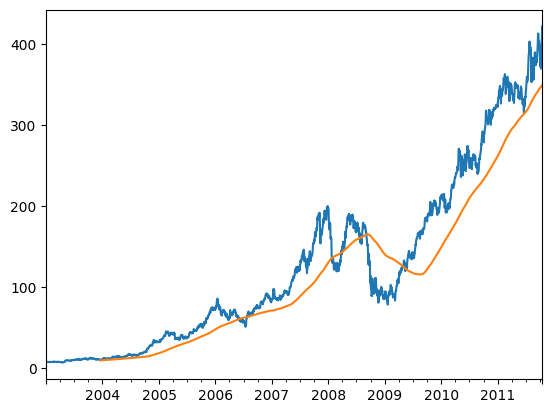

In [20]:
close_px_all = pd.read_csv('examples/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [22]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<Axes: >

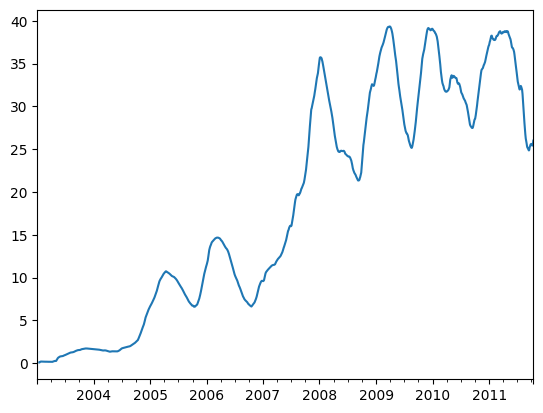

In [23]:
appl_std250.plot()

<Axes: >

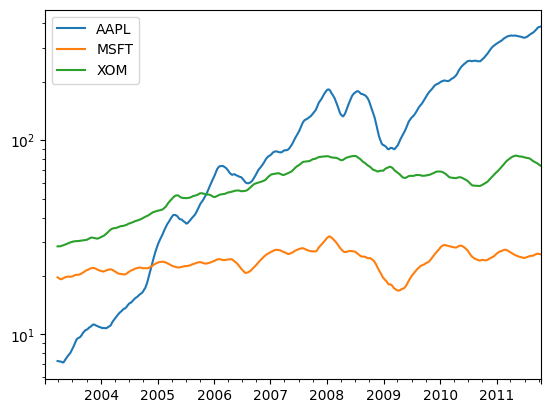

In [24]:
expanding_mean = appl_std250.expanding().mean()
close_px.rolling(60).mean().plot(logy=True)

In [26]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


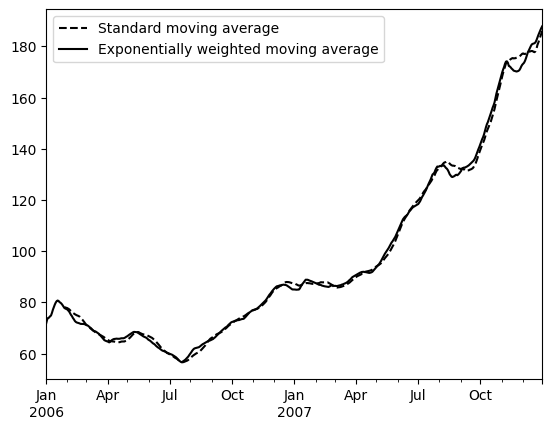

In [30]:
# Exponentially Weighted Functions

import matplotlib.pyplot as plt



aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Standard moving average')
ewma60.plot(style='k-', label='Exponentially weighted moving average')
plt.legend()

<Axes: >

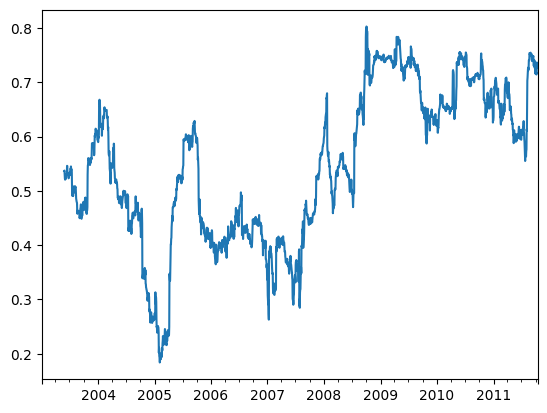

In [31]:
# Binary Moving Window Functions

spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<Axes: >

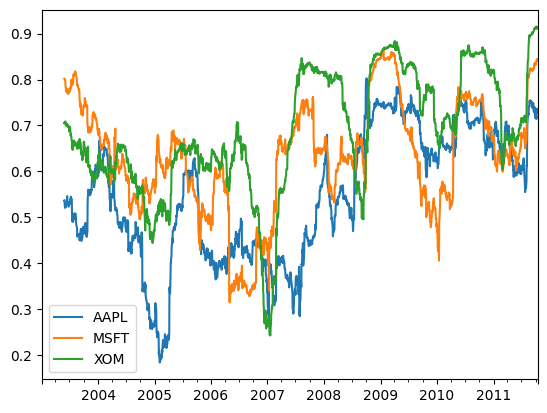

In [32]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<Axes: >

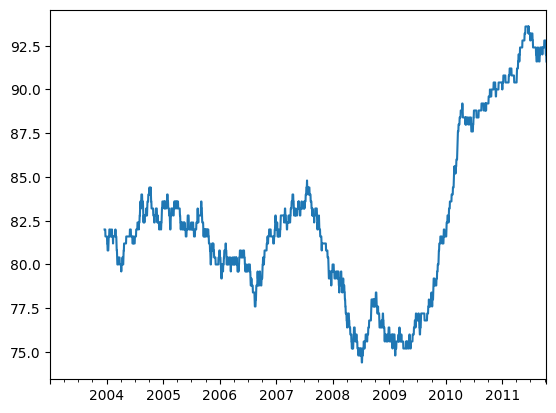

In [33]:
# User-Defined Moving Window Functions

from scipy.stats import percentileofscore


score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()